In [1]:
pip install opencv-python

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
#loading the image
img = image.load_img("C:/Users/mayur/Desktop/image classification/basedata/training/flood/image_2.jpg")

FileNotFoundError: ignored

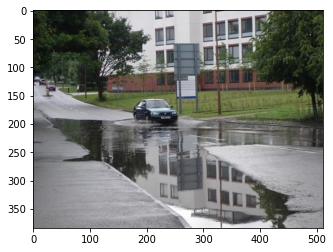

In [ ]:
#showing the image
plt.imshow(img)

In [ ]:
#To show the RGB values from 0 to 255
cv2.imread("C:/Users/mayur/Desktop/image classification/basedata/training/flood/image_2.jpg")

array([[[ 20,  22,  16],
        [ 23,  27,  21],
        [ 26,  34,  27],
        ...,
        [ 22,  28,  23],
        [ 28,  32,  27],
        [ 32,  36,  31]],

       [[ 21,  23,  17],
        [ 19,  23,  17],
        [ 17,  25,  18],
        ...,
        [ 26,  32,  27],
        [ 24,  30,  25],
        [ 23,  29,  24]],

       [[ 31,  33,  27],
        [ 26,  30,  24],
        [ 22,  30,  23],
        ...,
        [ 29,  36,  31],
        [ 23,  30,  25],
        [ 16,  23,  18]],

       ...,

       [[121, 119, 119],
        [123, 121, 121],
        [125, 123, 123],
        ...,
        [152, 147, 148],
        [149, 144, 145],
        [147, 142, 143]],

       [[121, 119, 119],
        [123, 121, 121],
        [126, 124, 124],
        ...,
        [149, 144, 145],
        [149, 144, 145],
        [149, 144, 145]],

       [[123, 121, 121],
        [126, 124, 124],
        [128, 126, 126],
        ...,
        [138, 133, 134],
        [146, 141, 142],
        [150, 145, 146]]

In [ ]:
#for shape
cv2.imread("C:/Users/mayur/Desktop/image classification/basedata/training/flood/image_2.jpg").shape

(384, 512, 3)

In [ ]:
#Generating training and validation dataset
#resizing the values from 0 to 255 to 0s and 1s
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
#giving labels to the images in the folder
#resizing the images to 200x200 to avoid conflicts
#batch_size defines how many images we train at one go
#class_mode defines how many labels we have.In this cas we have only 2 so, its "binary"

#for classification
train_dataset=train.flow_from_directory("C:/Users/mayur/Desktop/image classification/basedata/training/",
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
#for validation
validation_dataset=train.flow_from_directory("C:/Users/mayur/Desktop/image classification/basedata/validation/",
                                             target_size=(200,200),
                                             batch_size=3,
                                             class_mode='binary')

Found 358 images belonging to 2 classes.
Found 152 images belonging to 2 classes.


In [ ]:
#to show how it seperates between floods and landslides
train_dataset.class_indices

{'flood': 0, 'landslide': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#defining our model.Creating a convolutional Neural Network with max pooling
model =tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',
                                                          input_shape=(200,200,3)),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                                          tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
        
                                  ])

NameError: name 'tf' is not defined

In [ ]:
model.compile(loss ='binary_crossentropy',
             optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

NameError: name 'model' is not defined

In [ ]:
#epochs means the number of iterations...so according to this, it iterates 10 times
#increasing the epochs increases the accuracy so ,i'll increase from 10 >> 30
# with 10 - 60%
# with 30 - 70%
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 30,
                      validation_data= validation_dataset)
                     

NameError: name 'model' is not defined

In [ ]:
dir_path ='C:/Users/mayur/Desktop/image classification/basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i)
    plt.imshow(img)
    plt.show()

NameError: name 'os' is not defined

In [ ]:
#checking the data in 1s and 0s again
validation_dataset.class_indices


NameError: name 'validation_dataset' is not defined

In [ ]:
#predicting!
dir_path ='C:/Users/mayur/Desktop/image classification/basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("This is a FLOOD IMAGE")
    else:
        print("This is a LANDSLIDE IMAGE")


NameError: name 'os' is not defined